# Rental Price Data Analysis of Houses in Tehran

In this project, I aim to analyze the rental price data of houses in various regions of Tehran using machine learning, specifically regression methods. The dataset has been collected from the Divar website and pertains to the end of the Persian year 1399. This is my first machine learning project, and to accomplish it, I have utilized the codes and data provided by Mr. Amir Ali Madadi (https://github.com/amiralimadadi), which were shared on his GitHub page.

Finally, I would like to express my sincere gratitude to Mr. Amir Ali Madadi for making this data and his knowledge accessible. This project would not have been possible without his contribution.

## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from bidi.algorithm import get_display
from arabic_reshaper import reshape

##### In the first step, a graph of the average price per square meter of houses in Tehran has been plotted monthly from the beginning of the year 1395 to the end of the year 1399.

In [18]:
df_bachground =pd.read_csv(r"D:\ReGression\rental house price Tehran\TehranHousingPriceBackground.csv")
print(df_bachground.head())
print(df_bachground.shape)

    Month    Price
0  139501  4089000
1  139502  4287000
2  139503  4328000
3  139504  4350000
4  139505  4391000
(60, 2)


In [29]:
P139501=int(df_bachground.iloc[0,1])
P139912=int(df_bachground.iloc[59,1])
print(P139501)
print(P139912)
#calculating the growth of housing prices from the beginning of the year 1395 to the end of the year 1399
RPrice=((p139912/P139501)-1)*100
print(f'The growth of housing prices from the beginning of the year 1395 to the end of the year 1399 is {RPrice:.2f}%')

4089000
30274700
The growth of housing prices from the beginning of the year 1395 to the end of the year 1399 is 640.39%


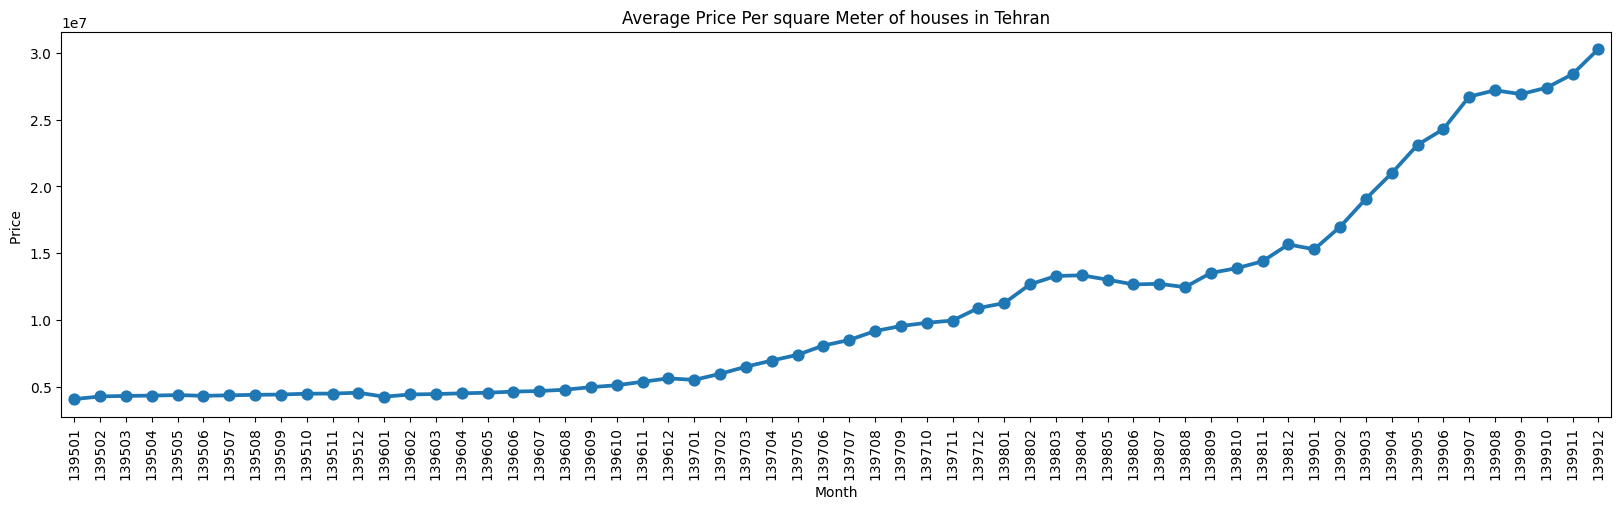

In [30]:
plt.figure(figsize= (20, 5))
sns.pointplot(data=df_bachground, x="Month", y="Price")
plt.ylabel(get_display(reshape('Price ')))
plt.xlabel(get_display(reshape('Month')))
plt.title('Average Price Per square Meter of houses in Tehran')
plt.xticks(rotation = "vertical")
plt.show()

### Description of the chart

- Between the years 1395 and 1399, housing prices in Tehran increased by approximately 640% on average.

- This significant growth is clearly illustrated in the housing price trend chart.

- The growth rate varies across different regions of Tehran:

- Northern districts experienced higher price increases due to luxury facilities and special geographic advantages.

- Central and southern districts showed comparatively lower growth.

- This disparity has created serious challenges for low-income groups to access housing.

- Comprehensive analysis of the data can help in devising effective solutions to manage the housing market and reduce inequalities.

## READING DATA
Data stored in csv file has 12,383 records containing 9 features. Features are:

- total_value: is the overall value of the house. It is calculated based on deposit and monthly rent.
- neighborhood: is filled based on the house position in Tehran.
- area: is the area of house in squared meter.
- year: is the year that the house is built.
- deposit: is the deposit of house in Iran currency (Tooman).
- rent: is the monthly rent of house in Iran currency (Tooman).
- elavator: indicates that house has elavator (1 for has and 0 for dose not have).
- parking: indicates that house has parking lot (1 for has and 0 for dose not have).
- warehouse: indicates that house has warehouse (1 for has and 0 for dose not have).

In [2]:
df = pd.read_csv(r'D:\ReGression\rental house price Tehran\Data.csv', encoding="utf-8") 

In [5]:
df.head(5)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1


In [6]:
print(df.dtypes)

total_value     float64
neighborhood     object
area              int64
year              int64
deposit         float64
rent            float64
elavator          int64
parking           int64
warehouse         int64
dtype: object


In [3]:
df['neighborhood'] = df['neighborhood'].astype(pd.StringDtype())
print(df.dtypes)

total_value            float64
neighborhood    string[python]
area                     int64
year                     int64
deposit                float64
rent                   float64
elavator                 int64
parking                  int64
warehouse                int64
dtype: object


##### The rows were checked for duplicates, and based on the output of the data dimensions, it was determined that there are no duplicate rows in the dataset.


In [8]:
print(df.shape)
df.drop_duplicates(subset =None, keep = 'first', inplace = True)
df.shape

(12383, 9)


(12383, 9)

In [9]:
#check missing values
print(df.isnull().any())

total_value     False
neighborhood    False
area            False
year            False
deposit         False
rent            False
elavator        False
parking         False
warehouse       False
dtype: bool


In [ ]:
## داده های پرت؟؟؟؟؟؟؟؟؟؟/

In [15]:
pd.set_option('display.max_rows', None)
result=df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean, np.var, 'count']).reset_index()
sorted_result = result.sort_values(('total_value', 'mean'), ascending=False)

# نمایش جدول مرتب‌شده
sorted_result

C:\Users\laptop\AppData\Local\Temp\ipykernel_9052\538857679.py:2: FutureWarning: The provided callable <function min at 0x00000199FF33A700> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  result=df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean, np.var, 'count']).reset_index()
C:\Users\laptop\AppData\Local\Temp\ipykernel_9052\538857679.py:2: FutureWarning: The provided callable <function max at 0x00000199FF33A5C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  result=df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean, np.var, 'count']).reset_index()
C:\Users\laptop\AppData\Local\Temp\ipykernel_9052\538857679.py:2: FutureWarning: The provided callable <function mean at 0x00000199FF33AFC0> is curren

neighborhood   total_value                              \
                                         min           max          mean   
79                 حصار بوعلی   3.000000e+09  3.000000e+09  3.000000e+09   
186             شهرک پاسداران   2.900000e+09  2.900000e+09  2.900000e+09   
29              امامزاده قاسم   7.009900e+07  5.000000e+09  1.790333e+09   
210                       ظفر   0.000000e+00  5.000014e+10  1.184147e+09   
119                  زعفرانیه   0.000000e+00  1.600000e+10  1.071022e+09   
219                   فرمانیه   0.000000e+00  1.500000e+10  9.571229e+08   
264                   نیاوران   0.000000e+00  1.300000e+10  9.207023e+08   
24                      الهیه   0.000000e+00  1.500000e+10  8.926399e+08   
100                      دروس   0.000000e+00  4.500000e+09  8.722058e+08   
64                     جماران   3.008100e+08  2.000900e+09  8.605280e+08   
22                     اقدسیه   0.000000e+00  5.000000e+09  8.241429e+08   
278                     ولنجک   0.000000e+00  1.200000e+10  8.121717e+08   
184     شهرک والفجر (منطقه ۶)   7.000000e+08  8.500000e+08  7.750000e+08   
101                      درکه   0.000000e+00  3.000000e+09  7.688474e+08   
225                       قبا   1.002850e+08  1.200000e+09  7.401380e+08   
239                   محمودیه   0.000000e+00  4.000000e+09  7.127134e+08   
52                      تجریش   0.000000e+00  2.000000e+09  7.103028e+08   
281                  پاسداران   0.000000e+00  3.000000e+09  6.755903e+08   
2                    آجودانیه   0.000000e+00  7.000000e+09  6.536545e+08   
47                     بهاران   6.500000e+08  6.500000e+08  6.500000e+08   
77                  حسین‌آباد   0.000000e+00  1.500000e+09  6.334483e+08   
49                  بهجت‌آباد   2.001290e+08  8.500000e+08  6.333763e+08   
132                سعادت‌آباد   0.000000e+00  7.000000e+09  6.326604e+08   
105                    دزاشیب   0.000000e+00  1.750000e+09  6.310362e+08   
291                      چیذر   1.301500e+08  1.600000e+09  6.284491e+08   
295                  کامرانیه   0.000000e+00  5.000000e+09  6.115425e+08   
232                    قیطریه   0.000000e+00  4.000000e+09  6.084778e+08   
302                  کوی فراز   1.002400e+08  2.000000e+09  6.004920e+08   
170                 شهرک امید   6.002700e+08  6.002700e+08  6.002700e+08   
96                    درب دوم   0.000000e+00  1.250000e+09  5.959671e+08   
234                    لواسان   0.000000e+00  2.000030e+09  5.919917e+08   
182        شهرک نفت (منطقه ۱)   0.000000e+00  8.000030e+08  5.824202e+08   
178                  شهرک غرب   0.000000e+00  3.500000e+09  5.544217e+08   
82                       حکمت   1.001050e+08  1.200750e+09  5.503750e+08   
201                    شیرازی   3.505100e+08  7.500000e+08  5.502550e+08   
252                  میرداماد   0.000000e+00  1.700000e+09  5.272396e+08   
279                       ونک   0.000000e+00  2.500000e+09  5.230100e+08   
229                 قنات‌کوثر   2.001500e+08  1.000000e+09  5.142050e+08   
32                   امیرآباد   0.000000e+00  3.000000e+09  5.012941e+08   
168                شهرک ابوذر   5.006000e+08  5.006000e+08  5.006000e+08   
123                   زیبادشت   5.000900e+08  5.000900e+08  5.000900e+08   
228                      قلهک   1.001650e+08  1.750000e+09  4.918271e+08   
269                      هروی   0.000000e+00  3.000003e+09  4.884783e+08   
180               شهرک محلاتی   0.000000e+00  1.500000e+09  4.833983e+08   
10                      اباذر   0.000000e+00  2.500000e+09  4.808796e+08   
38                    اکباتان   0.000000e+00  9.000000e+08  4.806923e+08   
13                   اختیاریه   0.000000e+00  2.500000e+09  4.798939e+08   
37                       اوین   0.000000e+00  2.000000e+09  4.708891e+08   
310            گیشا (کوی نصر)   0.000000e+00  2.100000e+09  4.677040e+08   
58                 تهران‌ویلا   1.701380e+08  9.000000e+08  4.580528e+08   
62                       جردن   0.000000e+00  1.600030e+09  4.4240

This table provides a summary of the "total_value" feature for various neighborhoods, including information such as the minimum, maximum, mean, variance, and the number of recorded transactions (count). The data is sorted in descending order by mean prices.

-Neighborhoods with the highest average prices:

Hesar Bouali: Has the highest mean price (3 billion Toman) with only one transaction recorded. Due to the low number of transactions (count = 1), a precise analysis of the market in this area is not possible.

- Anomalies and missing data:

1- Some neighborhoods, like Hesar Bouali and Baharan, lack variance (NaN), as they only have one transaction.

2- Minimum prices of 0 in several neighborhoods may point to incomplete or erroneous data that require cleaning.

- High-end areas:

Neighborhoods such as Zafaraniyeh, Farmanieh, and Niavaran exhibit consistently high average prices (exceeding 900 million Toman), highlighting them as upscale areas of Tehran.

#### calculating corrolation

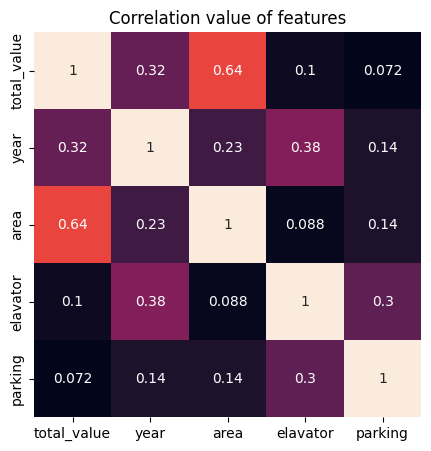

In [14]:
fig , axes = plt.subplots(1,1,figsize = (5, 5))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]
df_temp = df_temp[['total_value','year','area','elavator','parking']]
g1 = sns.heatmap(df_temp.corr(),annot=True, annot_kws={"size": 10},cbar=False)
g1.set(title='Correlation value of features');

#### 1. Data Filtering
The code first filters the data:

- Only neighborhoods containing the word "سعادت" (Sa'adat) are selected.
- The total_value column (total property value) must be less than 5e10 (50 billion) and must not be zero.

After filtering, the following columns are selected:
- total_value (total property value)
- year (construction year)
- area (property area)
- elavator (elevator presence)
- parking (parking availability)

#### 2. Correlation Matrix Calculation
The correlation matrix of the features is calculated using df_temp.corr(). This matrix shows how each feature is statistically related to the others:
- Positive correlation (e.g., +0.8) indicates a strong direct relationship.
- Negative correlation (e.g., -0.6) indicates an inverse relationship.
- Values near zero indicate weak or no relationship.


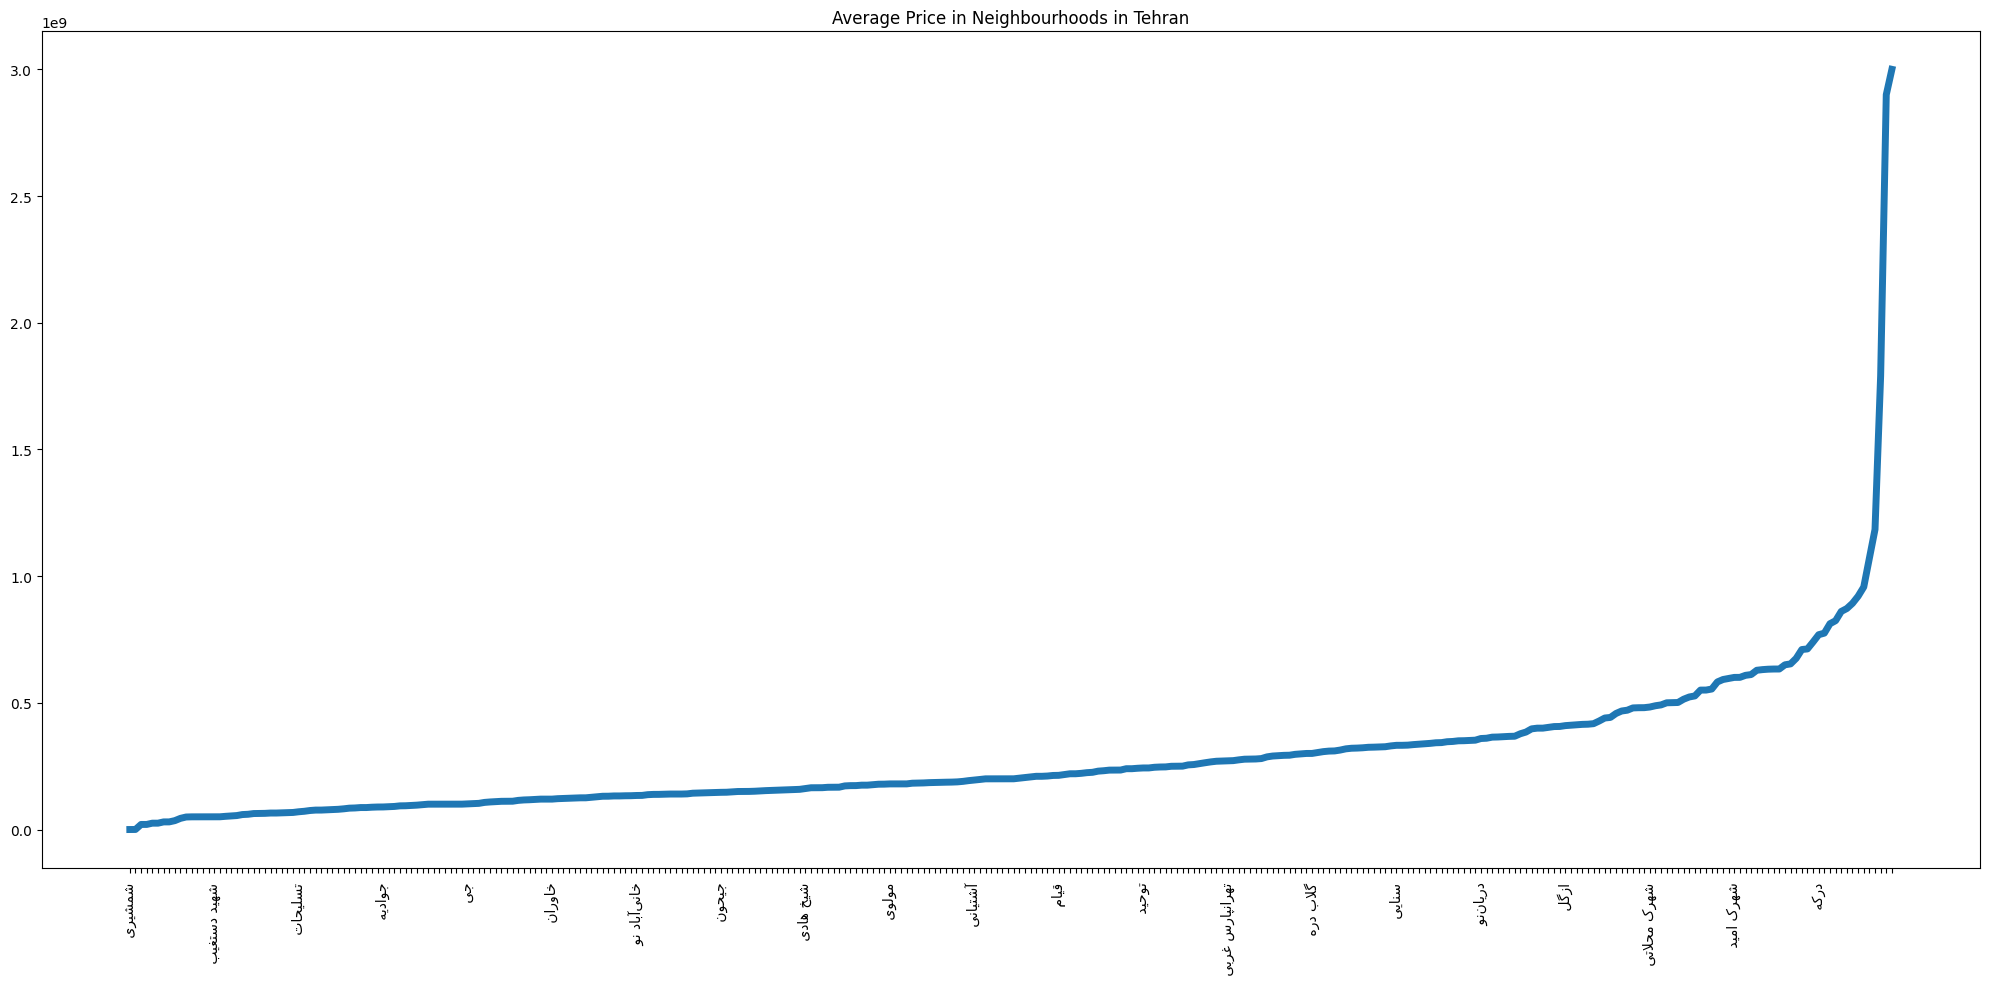

In [21]:
fig , axes = plt.subplots(1,1,figsize = (20, 10))
df_temp = df.groupby('neighborhood')[['total_value']].mean().reset_index()
df_temp = df_temp.sort_values('total_value')
g2 = sns.lineplot(data=df_temp, x = [get_display(reshape(label)) for label in df_temp['neighborhood']]
                  , y="total_value",linewidth = 5)

for ind, label in enumerate(g2.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g2.set(title='Average Price in Neighbourhoods in Tehran');
g2.set(ylabel='');
# g2.set(xlabel='Neighbourhood')
plt.setp(g2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


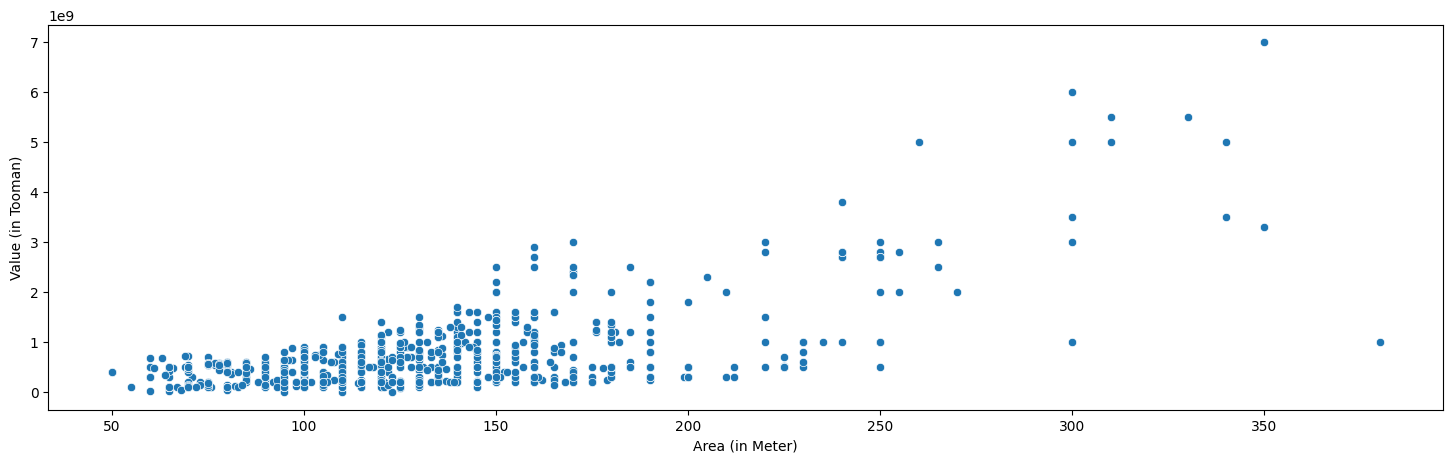

In [22]:
plt.figure(figsize= (18,5))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]

sns.scatterplot(x = "area", y = "total_value", data = df_temp,)
plt.xlabel('Area (in Meter)');
plt.ylabel('Value (in Tooman)');
plt.show()

As you can see below, there is a relation between area and total_value. As area increases, total_value increases too. So it seems that regression algorithms may result in good predictions.

### Removing useless records (records with 0 value)
I found some logically bad records in the dataset. Some bad records and features were removed in preparation step before, but there are some logical bad records in the dataset yet.

For example, I found some records with the value of 0 for total_value. It means that this house has the value of 0!. I guess these records have been inserted into dataset, beacuse of user faults, so I decide to remove them all. There are 1536 records with this situation in the dataset.

In [23]:
df = df[(df['total_value'] > 0) ]
df.shape


(10847, 9)

### Removing useless records (records with very small sample count)
I also noticed the neighborhoods with less than 10 samples. These neighborhoods will lead into generating too many columns in dummy transformation. I convert the their neighborhood to other سایر, to make my model better and more simple.

Finally, dataset contains 10847 acceptable records.

In [32]:
# Neighbourhoods with more than 10 samples are acceptable
df_temp = df['neighborhood'].value_counts(sort=True).to_frame()  # Convert to DataFrame
df_temp.columns = ['count']  # Rename column for clarity
df_temp = df_temp[df_temp['count'] < 10]  # Filter neighborhoods with less than 10 samples

# Replace neighborhoods with less than 10 samples with "سایر"
df.loc[df['neighborhood'].isin(df_temp.index), 'neighborhood'] = "سایر"

# Reset index
df.reset_index(drop=True, inplace=True)

# Print DataFrame shape
print(df.shape)


(10847, 9)


### Show top 15 neighbourhoods according to ads count


C:\Users\laptop\AppData\Local\Temp\ipykernel_12688\3158898242.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\laptop\AppData\Local\Temp\ipykernel_12688\3158898242.py:11: UserWarning: The palette list has more values (18) than needed (15), which may not be intended.
  sns.barplot(


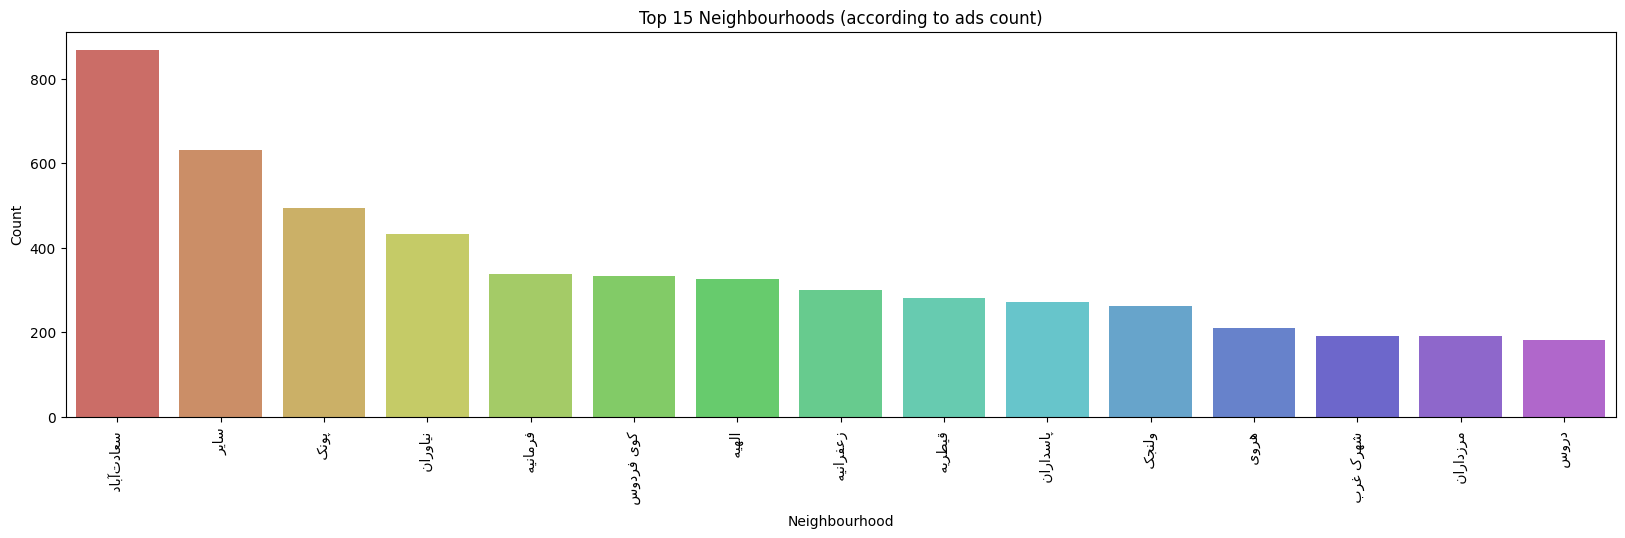

In [34]:
# Count the neighborhoods and convert to DataFrame
df_head_provinces = df['neighborhood'].value_counts(sort=True).to_frame()  # Convert to DataFrame
df_head_provinces.columns = ['count']  # Rename the column for clarity
df_head_provinces = df_head_provinces[df_head_provinces['count'] > 10]  # Filter neighborhoods with more than 10 samples

# Select top 15 neighborhoods
df_top_15 = df_head_provinces.head(15)

# Plot the data
plt.figure(figsize=(20, 5))
sns.barplot(
    data=df_top_15, 
    x=[get_display(reshape(label)) for label in df_top_15.index],
    y=df_top_15['count'].values, 
    palette=sns.color_palette("hls", 18)
)

# Set labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 15 Neighbourhoods (according to ads count)')

# Rotate x-axis labels
plt.xticks(rotation="vertical")
plt.show()


### Removing useless records (outliers)
Some houses have very unusual total_value or area. I consider them as outliers and remove them all and show them in graph below.

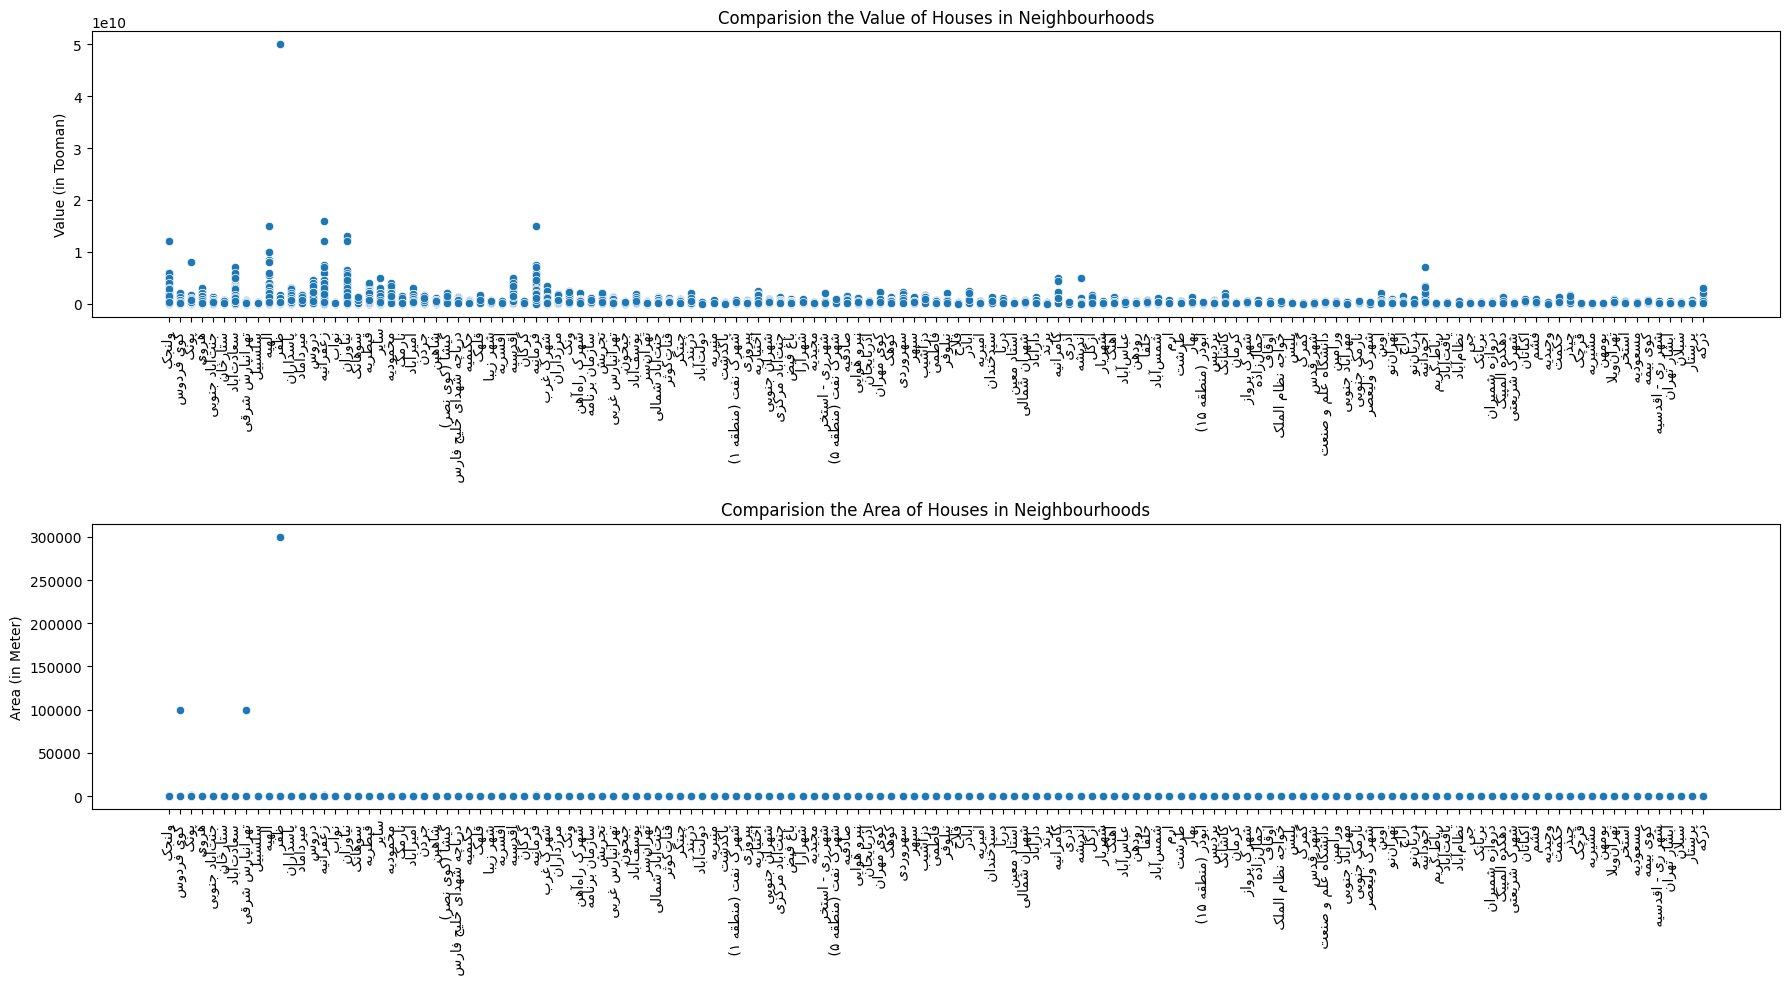

In [35]:
fig , axes = plt.subplots(2,1,figsize = (18, 10))
g1 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "total_value", data = df, ax=axes[0])
# g1.set(title=get_display(reshape('ارزش ملک در محله ها')))
# g1.set(ylabel=get_display(reshape('ارزش ملک')))
g1.set(title='Comparision the Value of Houses in Neighbourhoods');
g1.set(ylabel='Value (in Tooman)');
g1.set(xlabel=None)
plt.setp(axes[0].get_xticklabels(), rotation=90)


g2 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "area", data = df, ax=axes[1])
# g2.set(title=get_display(reshape('متراژ ملک در محله ها')))
# g2.set(ylabel=get_display(reshape('متراژ ملک')))
g2.set(title='Comparision the Area of Houses in Neighbourhoods');
g2.set(ylabel='Area (in Meter)');
g2.set(xlabel=None)
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

According to the chart, it is evident that the dataset includes outliers. If you look at the data frame bellow, you will find out that houses with the total_value more than 40,000,000,000 are outliers (1 record). You may notice the houses with the amount of area more than 100,000 squared meter are outliers too (3 records).

These records seem to be unusual due to user fault. For example, there is a house with just 50 squared meter and 50,000,000,000. This amount is almot twice the maximum of total_amount in dataset. Therefore, I can omit them all.


In [36]:
df_temp = df[(df['total_value'] > 30000000000) | (df['area'] >= 100000)]
df_temp.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
5641,6.007500e+08,ظفر,300000,1372,6.000000e+08,25000000.0,0,1,1
6283,1.501800e+08,کوی فردوس,100000,1398,1.500000e+08,6000000.0,1,1,1
9370,2.000450e+08,تهرانپارس شرقی,100000,1395,2.000000e+08,1500000.0,1,0,1
9712,5.000014e+10,ظفر,50,1392,5.000000e+10,4500000.0,1,0,1


In [37]:
# Removing outliers
df_temp = df[df['total_value'] > 30000000000]
# print (df_temp)
print('Outliers count the field of total_value:',df_temp['neighborhood'].count())
df = df[df['total_value'] < 30000000000]

df_temp = df[df['area']  >= 100000]
print('Outliers count the field of area:',df_temp['neighborhood'].count())
# print(df_temp)
df = df[df['area'] < 100000]

print('Final valid data count:',df['neighborhood'].count())

Outliers count the field of total_value: 1
Outliers count the field of area: 3
Final valid data count: 10843


At the end of data purification, dataset will consist of 10843 records. You can see distribution of data in top 15 neighbourhoods (according to sample counts), in the following graph.

### Data distribution in top 15 neighbourhoods according to ads count


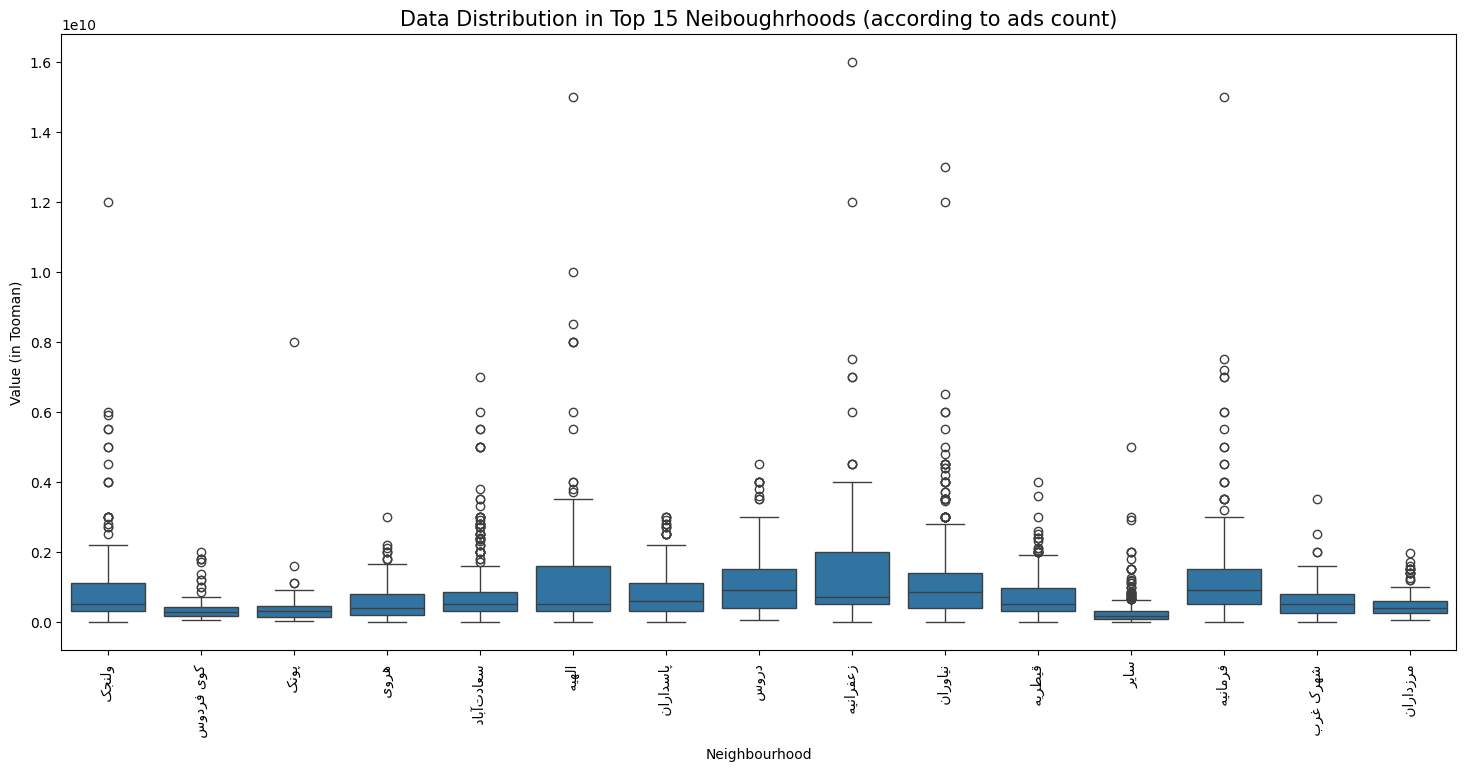

In [38]:
plt.figure(figsize= (18, 8))

df_head_provinces = pd.DataFrame(df['neighborhood'].value_counts(sort = True))
df_top_15 = df[df['neighborhood'].isin(df_head_provinces.head(15).index)]

sns.boxplot(x = [get_display(reshape(label)) for label in df_top_15['neighborhood']] 
            , y = "total_value", data = df_top_15)
# plt.title(get_display(reshape('توزیع داده در 15 محله پر آگهی')),fontsize="15")
plt.title('Data Distribution in Top 15 Neiboughrhoods (according to ads count)',fontsize="15")
plt.xlabel('Neighbourhood');
plt.ylabel('Value (in Tooman)');
plt.xticks(rotation = "vertical")
plt.show()

In [42]:
df_main = pd.get_dummies(df, columns=["neighborhood"])

df_main.drop(columns=['rent','deposit'], inplace=True, axis=1)

temp_data = df_main.to_numpy()
X = temp_data[:,1:]
y = temp_data[:,0]

In [45]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [52]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(x_test)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
print(f"Training R2 score = {LR.score(X_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")
#print("Coefficients:", [round(coef, 5) for coef in LR.coef_])
#print("Intercept:", round(LR.intercept_, 5))

Training R2 score = 0.47515470352679545
Test R2 score = 0.5039401987383083


## Conculusions:

#### 1. What is R²?
R² indicates how much of the variance in the target data (y) is explained by the model.
Its value ranges between 0 and 1:
Value 1: The model's predictions completely match the actual data.
Value 0: The model provides no useful information for prediction (equivalent to random guessing).

#### 2. Current values
Training R² = 0.475: This means the model explains approximately 47.5% of the variance in the training data.
Test R² = 0.504: This means the model explains approximately 50.4% of the variance in the test data.

#### 3. Is the model good?
Moderate accuracy: R² values less than 0.6 indicate that the model might not perform well in prediction.
Similar performance on Training and Test: The close R² values for training and test (0.475 and 0.504) suggest that the model likely does not suffer from overfitting.

